# **Youtube Earnings Prediction Project**
---

![Alt text](https://popsters.ru/blog/content/all/mceu0slh3u2zrs1wbuxpa1776pcvyzbyuf.jpg)

**Authors:** <br>
George Opondi  - $Team Leader$ <br>
Ida Chepngeno <br>
Kennedy Owino <br>
Edwin Mwai <br>
Cynthia Chepkosgei <br>
Kevan Ndwiga <br>
Colins Chumba <br>
Cynthia Kendi


## **Problem Statement**

The success of content creators on YouTube is often associated with various factors such as the number of views, engagement metrics, and the audience's demographics. This project seeks to develop a predictive model that estimates a YouTuber's earnings based on key performance indicators and other relevant factors. The goal is to provide content creators and stakeholders with a tool that offers insights into potential earnings, aiding in strategic decision-making and content optimization.

---


## **Main Objective**
Develop a robust and accurate linear regression model to predict average YouTube earnings for content creators, leveraging key performance indicators and relevant factors, in order to empower content creators with actionable insights for optimizing their content strategy and maximizing revenue on the YouTube platform.

---

### Specific Objectives
1. **Exploratory Data Analysis and Data Pre-Processing:** Perform EDA on the data to better understand the dataset. Clean and preprocess the dataset to handle missing values, outliers, and any other data inconsistencies.
2. **Model Development:** Apply linear regression modeling techniques to establish a relationship between the chosen independent variables and YouTube earnings.
3. **Feature Selection:** Identify and select the most significant independent variables that have a significant impact on earnings. 
4. **Assess Model Perfomance:** Estimate and Interprate the co-efficient of the significant predictor variables
5. **Interpretation of Results:** Interpret the coefficients of the regression model to understand the relative importance of each independent variable in predicting YouTube earnings. Provide insights into the factors that most strongly influence earnings.

---


## **Details on the Data set**

 This meticulously curated dataset unveils the statistics of the most subscribed YouTube channels. A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more.



### **Description of columns:**
---
**rank:** Position of the YouTube channel based on the number of subscribers

**Youtuber:** Name of the YouTube channel

**subscribers:** Number of subscribers to the channel

**video views:** Total views across all videos on the channel

**category:** Category or niche of the channel

**Title:** Title of the YouTube channel

**uploads:** Total number of videos uploaded on the channel

**Country:** Country where the YouTube channel originates

**Abbreviation:** Abbreviation of the country

**channel_type:** Type of the YouTube channel (e.g., individual, brand)

**video_views_rank:** Ranking of the channel based on total video views

**country_rank:** Ranking of the channel based on the number of subscribers within its country

**channel_type_rank:** Ranking of the channel based on its type (individual or brand)

**video_views_for_the_last_30_days:** Total video views in the last 30 days

**lowest_monthly_earnings:** Lowest estimated monthly earnings from the channel

**highest_monthly_earnings:** Highest estimated monthly earnings from the channel

**lowest_yearly_earnings:** Lowest estimated yearly earnings from the channel

**highest_yearly_earnings:** Highest estimated yearly earnings from the channel

**subscribers_for_last_30_days:** Number of new subscribers gained in the last 30 days

**created_year:** Year when the YouTube channel was created

**created_month:** Month when the YouTube channel was created

**created_date:** Exact date of the YouTube channel's creation

**Gross tertiary education enrollment (%):** Percentage of the population enrolled in tertiary education in the country

**Population:** Total population of the country

**Unemployment rate:** Unemployment rate in the country

**Urban_population:** Percentage of the population living in urban areas

**Latitude:** Latitude coordinate of the country's location

**Longitude:** Longitude coordinate of the country's location

In [1]:
# Adding necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan

plt.style.use('ggplot')

#ignoring future warnings
import warnings

warnings.simplefilter(action= 'ignore', category= FutureWarning)


## **Exploratory Data Analysis EDA**

In [2]:
df = pd.read_csv('Global YouTube Statistics (1).csv', encoding='latin-1', index_col=0)

In [4]:
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [3]:
df.tail()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
rank,,,,,,,,,,,,,,,,,,,,,
991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,4568.0,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,1.230000e+07,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
video views,995.0,1.103954e+10,1.411084e+10,0.000000e+00,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
uploads,995.0,9.187126e+03,3.415135e+04,0.000000e+00,1.945000e+02,7.290000e+02,2.667500e+03,3.013080e+05
video_views_rank,994.0,5.542489e+05,1.362782e+06,1.000000e+00,3.230000e+02,9.155000e+02,3.584500e+03,4.057944e+06
country_rank,879.0,3.860535e+02,1.232245e+03,1.000000e+00,1.100000e+01,5.100000e+01,1.230000e+02,7.741000e+03
channel_type_rank,962.0,7.457193e+02,1.944387e+03,1.000000e+00,2.700000e+01,6.550000e+01,1.397500e+02,7.741000e+03
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.000000e+00,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
lowest_monthly_earnings,995.0,3.688615e+04,7.185872e+04,0.000000e+00,2.700000e+03,1.330000e+04,3.790000e+04,8.509000e+05
highest_monthly_earnings,995.0,5.898078e+05,1.148622e+06,0.000000e+00,4.350000e+04,2.127000e+05,6.068000e+05,1.360000e+07
lowest_yearly_earnings,995.0,4.422574e+05,8.612161e+05,0.000000e+00,3.265000e+04,1.595000e+05,4.551000e+05,1.020000e+07


In [5]:
df.shape

(995, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 1 to 995
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Youtuber                                 995 non-null    object 
 1   subscribers                              995 non-null    int64  
 2   video views                              995 non-null    float64
 3   category                                 949 non-null    object 
 4   Title                                    995 non-null    object 
 5   uploads                                  995 non-null    int64  
 6   Country                                  873 non-null    object 
 7   Abbreviation                             873 non-null    object 
 8   channel_type                             965 non-null    object 
 9   video_views_rank                         994 non-null    float64
 10  country_rank                             879 non-null  

In [7]:
# checking null values
df.isnull().sum()

Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date                                 5
Gross tertiar

In [8]:
df.columns

Index(['Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Visualization of our independent variables against our dependent variable


## Data Pre-Processing

In [9]:
# Create a new column 'average_monthly_earnings' with the average of the two earnings columns
df['average_monthly_earnings'] = df[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean(axis=1)

# Drop the original columns if you no longer need them
df = df.drop(['lowest_monthly_earnings', 'highest_monthly_earnings'], axis=1)


# Create a new column 'average_yearly_earnings' with the average of the two earnings columns
df['average_yearly_earnings'] = df[['lowest_yearly_earnings', 'highest_yearly_earnings']].mean(axis=1)

# Drop the original columns if you no longer need them
df = df.drop(['lowest_yearly_earnings', 'highest_yearly_earnings'], axis=1)

# Display the updated DataFrame
df.head()

,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_monthly_earnings,average_yearly_earnings
rank,,,,,,,,,,,,,,,,,,,,,
1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,4782300.000,57600000.00
2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,...,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,0.025,0.31
3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2868500.000,34350000.00
4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,4196900.000,50350000.00
5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,3877950.000,46500000.00


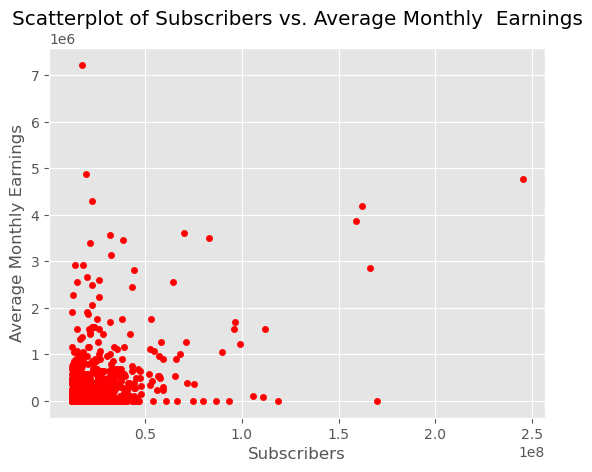

In [10]:
df.plot(x='subscribers', y='average_monthly_earnings', kind='scatter', color='red' )

# Adding labels and title
plt.xlabel('Subscribers')
plt.ylabel('Average Monthly Earnings')
plt.title('Scatterplot of Subscribers vs. Average Monthly  Earnings')

# Display the plot
plt.show()

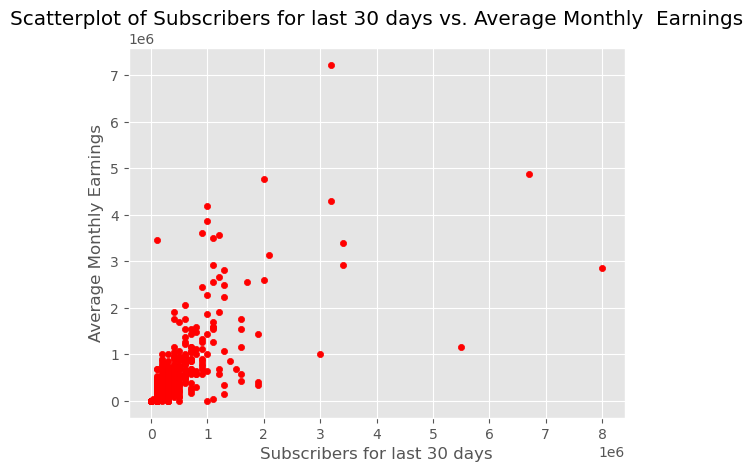

In [11]:
df.plot(x='subscribers_for_last_30_days', y='average_monthly_earnings', kind='scatter', color='red' )

# Adding labels and title
plt.xlabel('Subscribers for last 30 days')
plt.ylabel('Average Monthly Earnings')
plt.title('Scatterplot of Subscribers for last 30 days vs. Average Monthly  Earnings')

# Display the plot
plt.show()

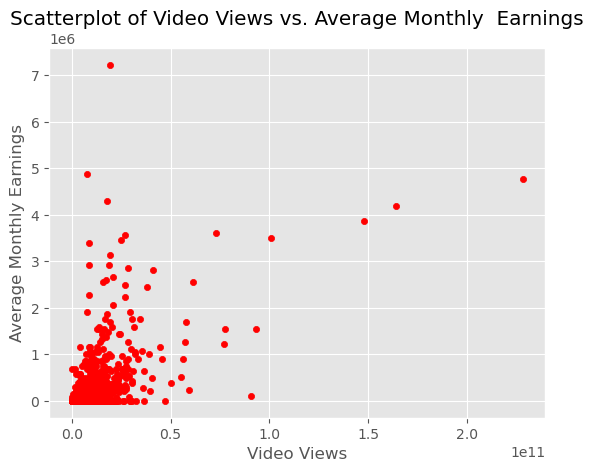

In [13]:
df.plot(x='video views', y='average_monthly_earnings', kind='scatter', color='red' )

# Adding labels and title
plt.xlabel('Video Views')
plt.ylabel('Average Monthly Earnings')
plt.title('Scatterplot of Video Views vs. Average Monthly  Earnings')

# Display the plot
plt.show()

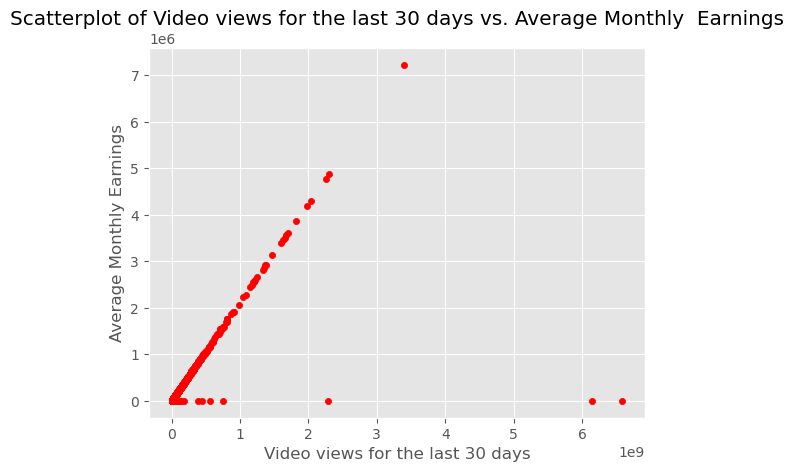

In [14]:
df.plot(x='video_views_for_the_last_30_days', y='average_monthly_earnings', kind='scatter', color='red' )

# Adding labels and title
plt.xlabel('Video views for the last 30 days')
plt.ylabel('Average Monthly Earnings')
plt.title('Scatterplot of Video views for the last 30 days vs. Average Monthly  Earnings')

# Display the plot
plt.show()

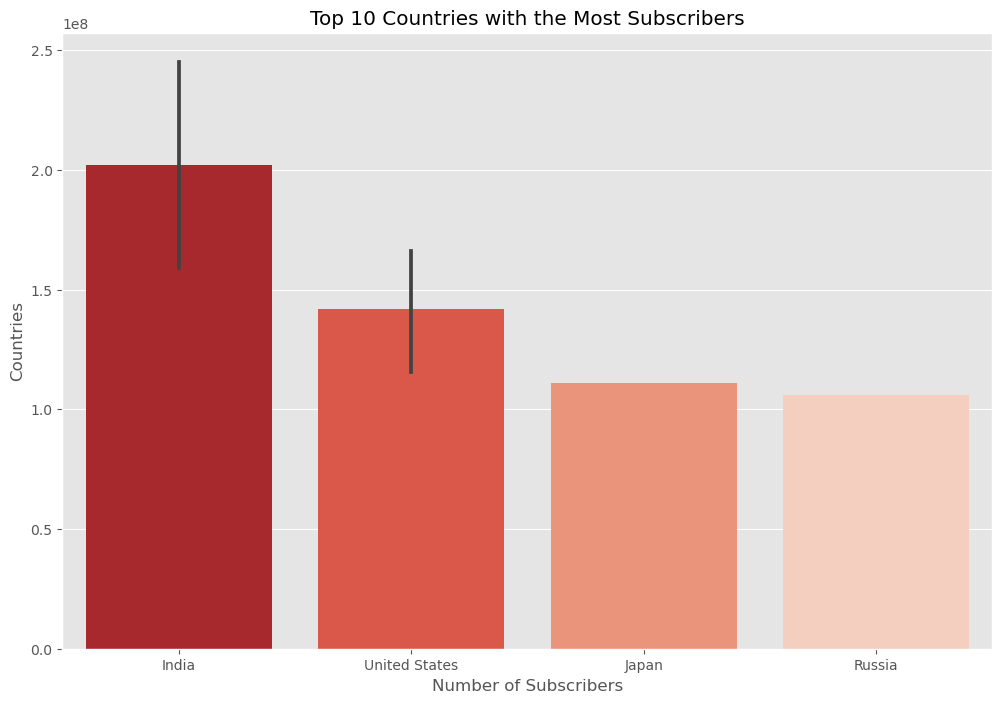

In [15]:
# Sort the DataFrame by subscribers in descending order
sorted_df = df.sort_values(by='subscribers', ascending=False)

# Select the top 10 countries
top_10_countries = sorted_df.head(10)

# Plotting the bar graph using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='subscribers', data=top_10_countries, palette='Reds_r')
plt.xlabel('Number of Subscribers')
plt.ylabel('Countries')
plt.title('Top 10 Countries with the Most Subscribers')
plt.show()

In [16]:
df = df.rename(columns={'video views': 'video_views'})

#### Correlation Matrix

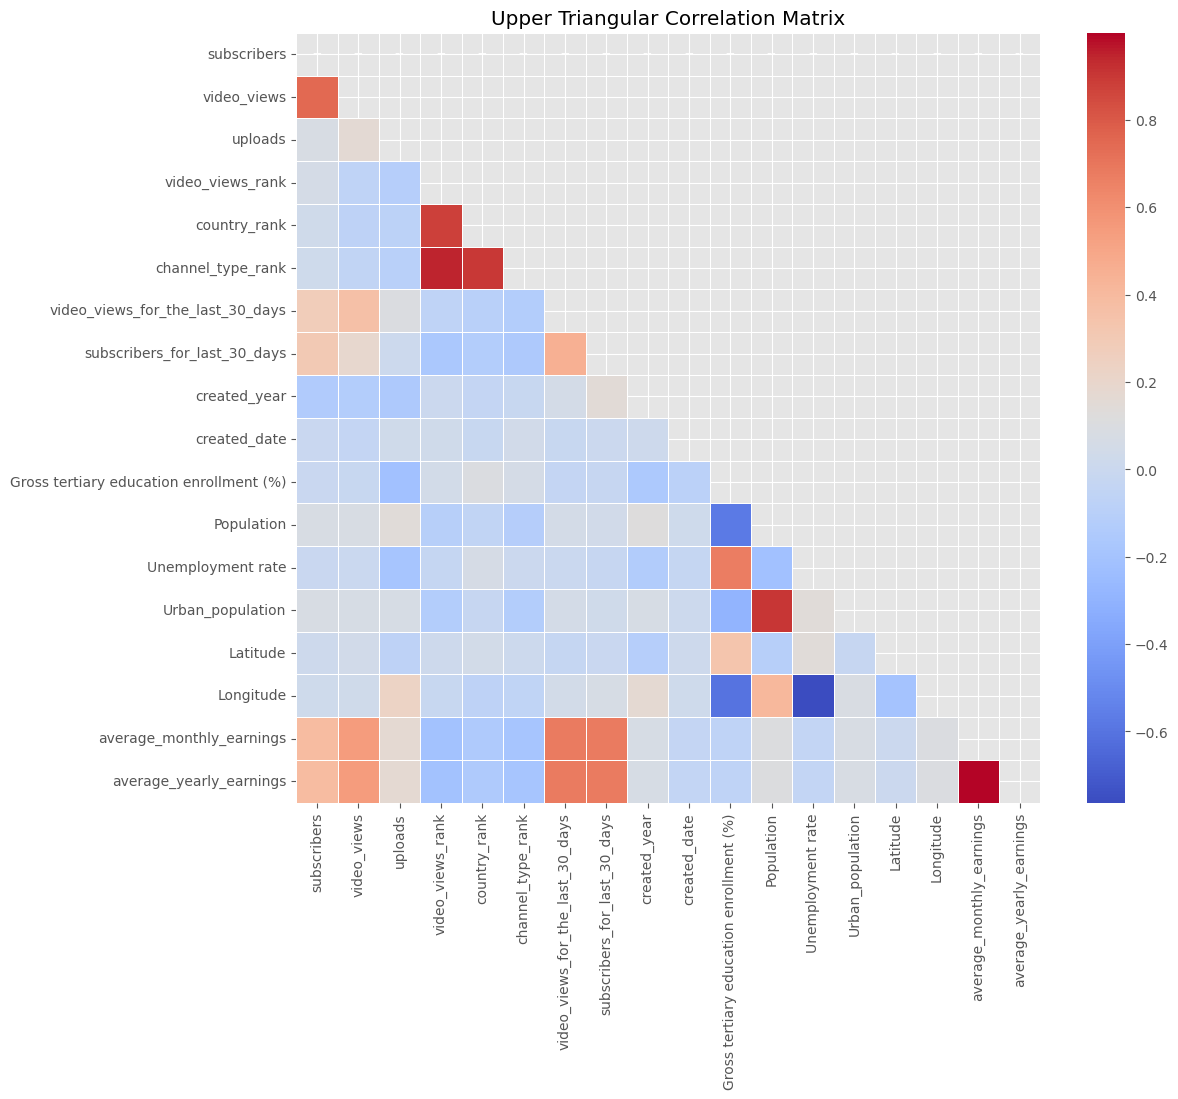

In [18]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a mask for the upper triangular matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap for visualization with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Upper Triangular Correlation Matrix')
plt.show()

In [19]:
#Correlation with output variable

cor_target = numeric_df.corr()["average_monthly_earnings"].abs().sort_values()
cor_target
 

Latitude                                   0.006856
created_date                               0.039977
Unemployment rate                          0.042642
Gross tertiary education enrollment (%)    0.061986
created_year                               0.072291
Urban_population                           0.081225
Longitude                                  0.100304
Population                                 0.104787
country_rank                               0.148960
uploads                                    0.167262
channel_type_rank                          0.187967
video_views_rank                           0.208932
subscribers                                0.388601
video_views                                0.551494
subscribers_for_last_30_days               0.679681
video_views_for_the_last_30_days           0.680293
average_yearly_earnings                    0.999958
average_monthly_earnings                   1.000000
Name: average_monthly_earnings, dtype: float64

In [21]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

subscribers                         0.388601
video_views                         0.551494
subscribers_for_last_30_days        0.679681
video_views_for_the_last_30_days    0.680293
average_yearly_earnings             0.999958
average_monthly_earnings            1.000000
Name: average_monthly_earnings, dtype: float64

In [22]:
# Keeping the most related colums and the categorical columns
columns_to_keep = ['subscribers', 'subscribers_for_last_30_days', 'video_views', 'video_views_for_the_last_30_days', 'average_monthly_earnings', 'Country', 'channel_type']
# Drop columns not in the specified list
df = df[columns_to_keep]
df.head()

,subscribers,subscribers_for_last_30_days,video_views,video_views_for_the_last_30_days,average_monthly_earnings,Country,channel_type
rank,,,,,,,
1,245000000,2000000.0,2.280000e+11,2.258000e+09,4782300.000,India,Music
2,170000000,NaN,0.000000e+00,1.200000e+01,0.025,United States,Games
3,166000000,8000000.0,2.836884e+10,1.348000e+09,2868500.000,United States,Entertainment
4,162000000,1000000.0,1.640000e+11,1.975000e+09,4196900.000,United States,Education
5,159000000,1000000.0,1.480000e+11,1.824000e+09,3877950.000,India,Entertainment


In [23]:
# checking null values
df.isnull().sum()

subscribers                           0
subscribers_for_last_30_days        337
video_views                           0
video_views_for_the_last_30_days     56
average_monthly_earnings              0
Country                             122
channel_type                         30
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subscribers,995.0,2.298241e+07,1.752611e+07,12300000.0,1.450000e+07,1.770000e+07,2.460000e+07,2.450000e+08
subscribers_for_last_30_days,658.0,3.490791e+05,6.143554e+05,1.0,1.000000e+05,2.000000e+05,4.000000e+05,8.000000e+06
video_views,995.0,1.103954e+10,1.411084e+10,0.0,4.288145e+09,7.760820e+09,1.355470e+10,2.280000e+11
video_views_for_the_last_30_days,939.0,1.756103e+08,4.163782e+08,1.0,2.013750e+07,6.408500e+07,1.688265e+08,6.589000e+09
average_monthly_earnings,995.0,3.133470e+05,6.102391e+05,0.0,2.310000e+04,1.130000e+05,3.223500e+05,7.225450e+06


#### Handling missing values

In [25]:
#Replacing the missing values in categorical columns  with "Other"
df['Country'].fillna('Other', inplace=True)
df['channel_type'].fillna('Other', inplace=True)

<Axes: >

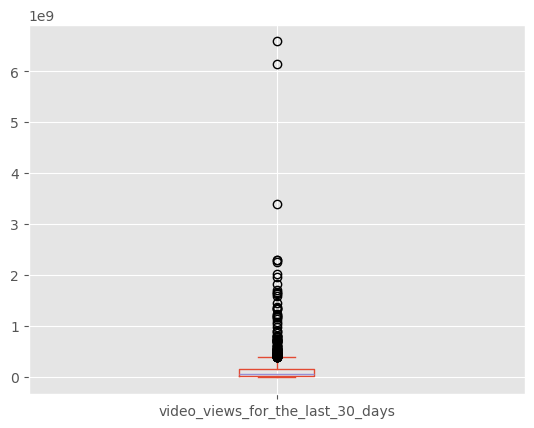

In [26]:
#boxplot of the 'video_views_for_the_last_30_days'

df['video_views_for_the_last_30_days'].plot.box()

In [27]:
#Replacing missing values of video_views_for_last_30_days with the mode
mode_value = df["video_views_for_the_last_30_days"].mode()[0]
df["video_views_for_the_last_30_days"].fillna(mode_value, inplace=True)

<Axes: >

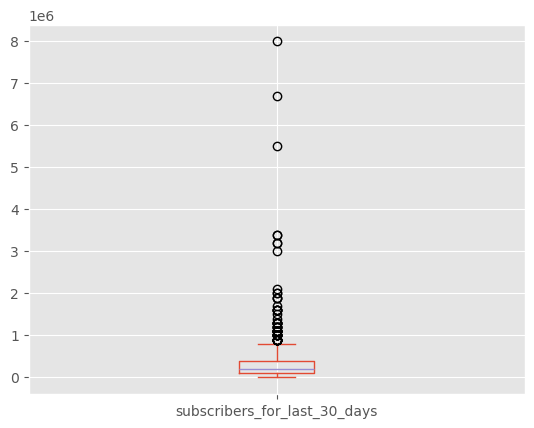

In [28]:
#boxplot for "subscribers_for_last_30_days" 

df["subscribers_for_last_30_days"].plot.box()

In [29]:
#Replacing missing values of subscribers_for_last_30_days with the mode
mode_value = df["subscribers_for_last_30_days"].mode()[0]
df["subscribers_for_last_30_days"].fillna(mode_value, inplace=True)

In [30]:
# checking null values
df.isnull().sum()

subscribers                         0
subscribers_for_last_30_days        0
video_views                         0
video_views_for_the_last_30_days    0
average_monthly_earnings            0
Country                             0
channel_type                        0
dtype: int64

In [31]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('global_cleaned.csv', index= False)

## Regression Model Development

In [32]:
relevant_features = cor_target[cor_target>0.3]
relevant_features

subscribers                         0.388601
video_views                         0.551494
subscribers_for_last_30_days        0.679681
video_views_for_the_last_30_days    0.680293
average_yearly_earnings             0.999958
average_monthly_earnings            1.000000
Name: average_monthly_earnings, dtype: float64

In [39]:
#filtering columns with views more than 0

df = df.loc[df['video_views'] > 0]

In [34]:
#Defining the X and y

X = df[['subscribers', 'video_views','subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]

y = df['average_monthly_earnings']

In [35]:
#building the baseline model
simple_formula = "average_monthly_earnings  ~ video_views_for_the_last_30_days"
simple_model = ols(simple_formula, data=df).fit()
simple_model_summary = simple_model.summary()
print(simple_model_summary)

                               OLS Regression Results                               
Dep. Variable:     average_monthly_earnings   R-squared:                       0.467
Model:                                  OLS   Adj. R-squared:                  0.467
Method:                       Least Squares   F-statistic:                     863.9
Date:                      Wed, 31 Jan 2024   Prob (F-statistic):          7.68e-137
Time:                              19:09:57   Log-Likelihood:                -14241.
No. Observations:                       987   AIC:                         2.849e+04
Df Residuals:                           985   BIC:                         2.849e+04
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [36]:
#checking the mean absolute error for the model

predicted_earnings = simple_model.predict(df['video_views_for_the_last_30_days'])

mae = mean_absolute_error(df['average_monthly_earnings'], predicted_earnings)

mae

183123.77140663582

**Interpretation**

The simple model has a R-squared of 0.468 therefore explaining aproximately 47% of the variation in the average monthly earnings.

The overall model is significant.

All the coefficients are significant.

A one unit increase in video views for the last 30 days, leads to approximately 0.001 increase in the average monthly earning.

For every prediction made by the `simple_model`, the predicted earning will always be off by approximately $183,123.

**The multiple linear regression model**

In [37]:
#Including all the other variables in the model
multiple_formula = 'average_monthly_earnings ~ video_views_for_the_last_30_days + subscribers_for_last_30_days + video_views  + subscribers'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()
print(multiple_model_summary)

                               OLS Regression Results                               
Dep. Variable:     average_monthly_earnings   R-squared:                       0.764
Model:                                  OLS   Adj. R-squared:                  0.764
Method:                       Least Squares   F-statistic:                     796.9
Date:                      Wed, 31 Jan 2024   Prob (F-statistic):          1.73e-306
Time:                              19:10:44   Log-Likelihood:                -13838.
No. Observations:                       987   AIC:                         2.769e+04
Df Residuals:                           982   BIC:                         2.771e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

### Model Diagnostics
---

**Checking for Multicolinearity**

In [42]:
#calculating the variance inflation factor for the variables

df_vif_data  = X



vif_result = [round(VIF(X.values, i)) for i in range(X.shape[1])]

dict(zip(df_vif_data, vif_result))

{'subscribers': 5,
 'video_views': 5,
 'subscribers_for_last_30_days': 2,
 'video_views_for_the_last_30_days': 2}

All the features have VIF score of less than 5 therefore the features are moderately correlated.

**Linearity Asumption**

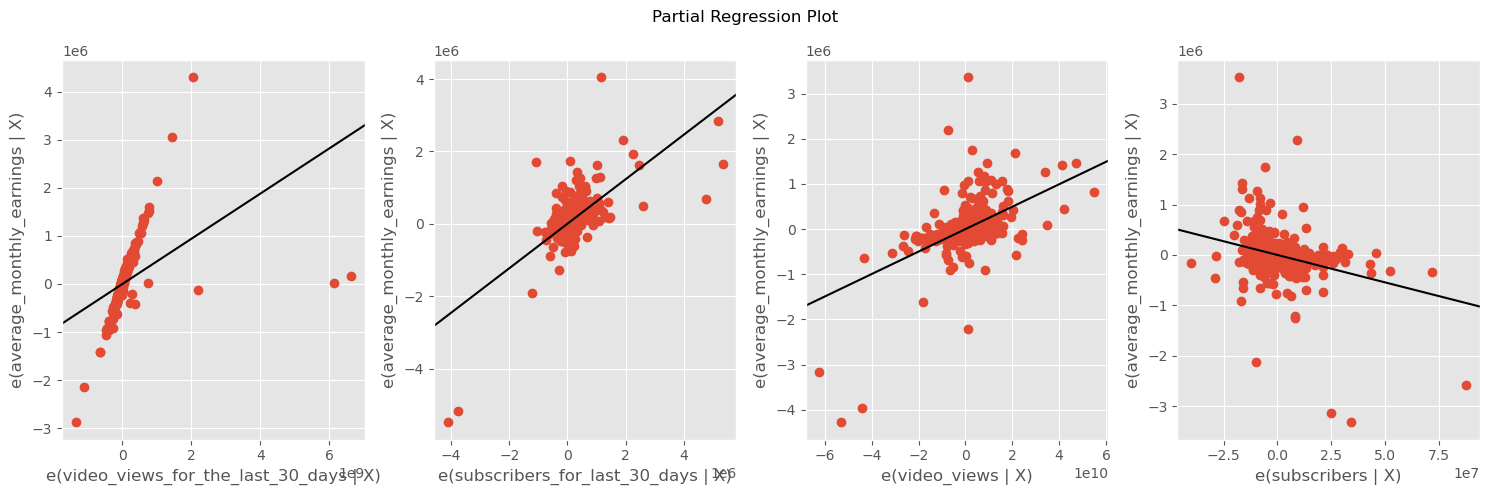

In [ ]:
#plotting the partial regression plots

fig = plt.figure(figsize= (15, 5))

sm.graphics.plot_partregress_grid(multiple_model, exog_idx= ['video_views_for_the_last_30_days', 
                                                             'subscribers_for_last_30_days', 'video_views','subscribers'],
                                                             grid= (1,4),
                                                             fig=  fig)
plt.tight_layout();

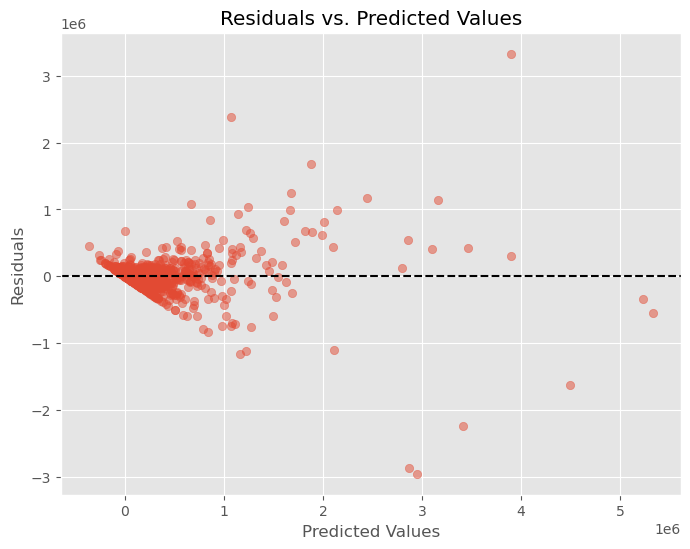

In [46]:
# Get the predicted values and residuals

predicted_values = multiple_model.predict()
residuals = multiple_model.resid

# Create a scatterplot of predicted values vs. residuals
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

From the plot of the resuduals against predicted values, it appears to be no discernible pattern. This suggests that the linearity assumption of the multiple linear regression model is not violated, indicating that the linear relationship between the independent variables and the dependent variable is adequately captured by the model.

**Normality Assumption**

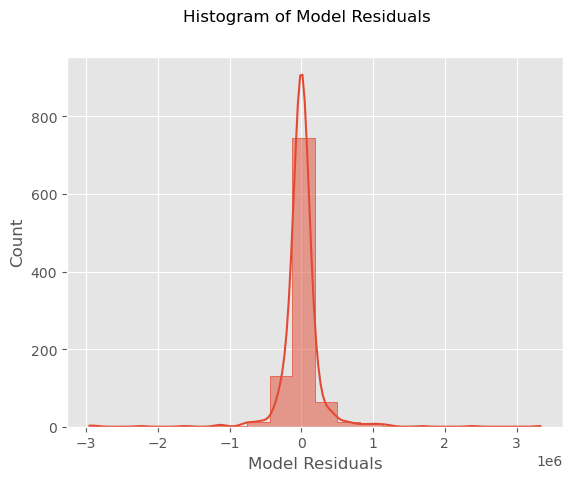

In [ ]:
#Histogram of the model residuals
fig, ax = plt.subplots()
sns.histplot(multiple_model.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Histogram of Model Residuals");

Based on the histogram plot of the residuals from the model, it's observe that the distribution of the residuals exhibits some deviation from perfect normality, although it appears to be approximately normal.

### Interpretation of the Model Results

Adjusted R-squared (0.764) indicates that approximately 76% of the variation in the average monthly earnings of a YouTube channel can be explained by the independent variables `video_views_for_the_last_30_days`, `subscribers_for_last_30_days`, `video_views`, and `subscribers`.

The model is statistically significant, suggesting that the combination of independent variables significantly predicts the average monthly earnings of a YouTube channel.

All coefficients in the model are statistically significant at the 5% level of significance.

The intercept, which is 43640, represents the average monthly earnings of a YouTube channel when all independent variables (`video_views_for_the_last_30_days`, `subscribers_for_last_30_days`, `video_views`, and `subscribers`) are zero. However, the interpretation of the intercept in this context may be nonsensical as it implies earning without any activity on the channel.

For the variable `video_views_for_the_last_30_days`, the coefficient 0.0005 indicates that for every one-unit increase in the number of video views in the last 30 days, there is an approximate increase of $0.0005 in the average monthly earning of the YouTube channel, holding all other variables constant.

For the variable `subscribers_for_last_30_days`, the coefficient of 0.614 indicates that the estimated increase in the average monthly earnings of the YouTube channel is approximately $0.614 for every one-unit increase in the number of subscribers in the last 30 days, while holding all other variables constant.

For the variable `video_views`, the coeffiecient 0.00024 indicates that for every one-unit increase in the number of video views, there is an aproximate increase of $0.00024 in the average monthly earning of the YouTube channel while holding all other variables constant.


For the variable `subscribers`,the coefficient of -0.0109 indicates that for every one unit increase in the number of the channel subscribers, there is an aproximate decrease in of 0.01 in the average monthly earning of the YouTube channel, holding all the other variable constant.


---

## **Conclusions**
---
Based on the provided model results, here are some of conclusions that can be drawn from the project:

$i).$ **Key Predictors of Average Monthly Earnings:** The independent variables `video_views_for_the_last_30_days`, `subscribers_for_last_30_days`, `video_views`, and `subscribers` are significant predictors of the average monthly earnings of a YouTube channel. Specifically, an increase in the number of video views and subscribers, both within the last 30 days and overall, positively impacts the average monthly earnings.<br>

$ii).$ Since earning on a YouTube channel typically requires some level of activity (e.g., video uploads, subscriber engagement), the intercept value of $43,640 when all variables are zero may not be practically relevant for this model. <br>

$iii).$ The model provides valuable insights into the factors influencing the average monthly earnings of a YouTube channel, with subscriber count and recent video views being the most influential variables. However, the negative impact of subscribers on earnings suggests a potential need for further investigation into subscriber engagement or other factors influencing this relationship.



## **Recommendation**
---

$i).$ Given that this project is based on a dataset comprising 995 records, it is advisable for future projects to consider incorporating a larger dataset to enhance the accuracy of the predictive model for individual YouTube earnings.